## Calculate Date gap (hearing_date - ticket_issued_date)

In [1]:
import pandas as pd
import numpy as np



# !!--- load data files ---!!
train_data = pd.read_csv('train.csv', encoding = "ISO-8859-1")                                 #(250306, 34)
test_data = pd.read_csv('test.csv', encoding = "ISO-8859-1")   #X_test                         #(61001, 27)
#address & latlons are not relevant here



# !!--- Calculate Date gap (hearing_date - ticket_issued_date) ---!!
from datetime import datetime

def time_gap(hearing_date_str, ticket_issued_date_str):
    if not hearing_date_str or type(hearing_date_str)!=str: return 73
    hearing_date = datetime.strptime(hearing_date_str, "%Y-%m-%d %H:%M:%S")
    ticket_issued_date = datetime.strptime(ticket_issued_date_str, "%Y-%m-%d %H:%M:%S")
    gap = hearing_date - ticket_issued_date
    return gap.days

train_data = train_data[~train_data['hearing_date'].isnull()]           #drop rows in hearing date with nan
train_data['time_gap'] = train_data.apply(lambda row: time_gap(row['hearing_date'], row['ticket_issued_date']), axis=1)
test_data['time_gap'] = test_data.apply(lambda row: time_gap(row['hearing_date'], row['ticket_issued_date']), axis=1)

train_data[['ticket_id','hearing_date','ticket_issued_date','time_gap']]

D:\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (11,12,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ticket_id,hearing_date,ticket_issued_date,time_gap
0,22056,2005-03-21 10:30:00,2004-03-16 11:40:00,369
1,27586,2005-05-06 13:30:00,2004-04-23 12:30:00,378
2,22062,2005-03-29 10:30:00,2004-04-26 13:40:00,336
4,22093,2005-03-29 10:30:00,2004-04-26 13:00:00,336
5,22046,2005-03-21 10:30:00,2004-05-01 11:50:00,323
6,18738,2005-02-22 15:00:00,2004-06-14 14:15:00,253
7,18735,2005-02-22 15:00:00,2004-06-16 12:30:00,251
8,18733,2005-02-22 15:00:00,2004-06-16 12:25:00,251
9,28204,2005-05-31 13:30:00,2004-07-12 13:30:00,323
10,18739,2005-02-22 15:00:00,2004-07-15 13:00:00,222


## Convert nan to 'NA'

In [10]:
# !!--- Prepare X_train, y_train, X_test ---!!
X_train = train_data.dropna(subset=['compliance'])   #dropna in compliance column              #(159880, 34)
y_train = X_train['compliance'].astype(int)   #compliance column converted to int without na   #(159880,)
X_test = test_data                                                                             #(61001, 27)
#y_prob is need to be predicted (objective)   #y_proba_cls = cls.fit(X_train, y_train).predict_proba(X_test)



# !!--- Convert missing values Nan to 0 for int and "NA" for string in X_train & X_test ---!!
# !-- X_train --!
X_train_converted_na = X_train.copy()

convert_nan_to_NA_X_train = [
    'violator_name',
    'violation_zip_code',
    'mailing_address_str_name',
    'state',
    'zip_code',
    'non_us_str_code',
    'hearing_date',
    'grafitti_status',
    'payment_date',
    'collection_status',
    'mailing_address_str_number'
]

X_train_converted_na[convert_nan_to_NA_X_train] = X_train[convert_nan_to_NA_X_train].fillna('NA')

# !-- X_test --!
X_test_converted_na = X_test.copy()

convert_nan_to_NA_X_test = [
    'violator_name',
    'violation_zip_code',
    'mailing_address_str_name',
    'city',
    'state',
    'zip_code',
    'non_us_str_code',
    'hearing_date',
    'grafitti_status',
    'mailing_address_str_number'
]

X_test_converted_na[convert_nan_to_NA_X_test] = X_test[convert_nan_to_NA_X_test].fillna('NA')

X_train_converted_na.isnull().any()                                                                       #(159880, 34)
# X_test_converted_na.isnull().any()                                                                        #(61001, 27)


ticket_id                     False
agency_name                   False
inspector_name                False
violator_name                 False
violation_street_number       False
violation_street_name         False
violation_zip_code            False
mailing_address_str_number    False
mailing_address_str_name      False
city                          False
state                         False
zip_code                      False
non_us_str_code               False
country                       False
ticket_issued_date            False
hearing_date                  False
violation_code                False
violation_description         False
disposition                   False
fine_amount                   False
admin_fee                     False
state_fee                     False
late_fee                      False
discount_amount               False
clean_up_cost                 False
judgment_amount               False
payment_amount                False
balance_due                 

## Feature Drop

In [80]:
# !!--- Drop irrelevant features ---!!
# !-- feature drop for X_train & X_test both --!
feature_drop = [
    'agency_name',                #irrelevant
    'inspector_name',             #irrelevant
    'violator_name',              #irrelevant
    'violation_street_number',    #irrelevant
    'violation_street_name',      #irrelevant
    'violation_zip_code',         #irrelevant
    'violation_description',      #similar to violation_code
    #'violation_code',             #irrelevant
    'mailing_address_str_number', #we have city
    'mailing_address_str_name',   #we have city
    'zip_code',                   #we have city
    #'state',                      #we have city
    'hearing_date',               #we have time_gap
    'ticket_issued_date',         #we have time_gap
    #'grafitti_status',            #too few data in X_train
    'country',                    #only 3 rows are not USA
    'non_us_str_code',            #too few data in X_train & X_test
    #'clean_up_cost',              #all 0 in X_train
    #'fine_amount',                #sum of judgment_amount
    #'admin_fee',                  #sum of judgment_amount
    #'state_fee',                  #sum of judgment_amount
    #'late_fee'                    #sum of judgment_amount
]

# !-- additional feature drop for X_train --!
feature_drop_X_train = [
    'balance_due',                #data leakage
    'payment_amount',             #data leakage
    'payment_date',               #data leakage
    'payment_status',             #data leakage
    'compliance_detail',          #data leakage
    'compliance',                 #data leakage
    'collection_status'           #data leakage
]

X_train_converted_na_dropped = X_train_converted_na.drop(feature_drop, axis=1)
X_train_converted_na_dropped = X_train_converted_na_dropped.drop(feature_drop_X_train, axis=1)      #(159880, 5)
X_test_converted_na_dropped = X_test_converted_na.drop(feature_drop, axis=1)                      #(61001, 5)

# !-- Set index = ticket_id --!
X_train_converted_na_dropped = X_train_converted_na_dropped.set_index('ticket_id')                 #(159880, 4)
X_test_converted_na_dropped = X_test_converted_na.set_index('ticket_id')                  #(61001, 4)

X_train_converted_na_dropped

,city,state,violation_code,disposition,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount,grafitti_status,time_gap
ticket_id,,,,,,,,,,,,,
22056,CHICAGO,IL,9-1-36(a),Responsible by Default,250.0,20.0,10.0,25.0,0.0,0.0,305.0,NA,369
27586,Detroit,MI,61-63.0600,Responsible by Determination,750.0,20.0,10.0,75.0,0.0,0.0,855.0,NA,378
22046,LOG BEACH,CA,9-1-36(a),Responsible by Default,250.0,20.0,10.0,25.0,0.0,0.0,305.0,NA,323
18738,Clinton,MI,61-63.0500,Responsible by Default,750.0,20.0,10.0,75.0,0.0,0.0,855.0,NA,253
18735,Detroit,MI,61-63.0100,Responsible by Default,100.0,20.0,10.0,10.0,0.0,0.0,140.0,NA,251
18733,Detroit,MI,61-63.0100,Responsible by Default,100.0,20.0,10.0,10.0,0.0,0.0,140.0,NA,251
28204,Detroit,MI,61-63.0600,Responsible by Default,750.0,20.0,10.0,75.0,0.0,0.0,855.0,NA,323
18743,Detroit,MI,61-63.0600,Responsible by Default,750.0,20.0,10.0,75.0,0.0,0.0,855.0,NA,209
18741,Detroit,MI,61-63.0600,Responsible by Default,750.0,20.0,10.0,75.0,0.0,0.0,855.0,NA,201


## Convert String columns to category columns and then convert them to codes

In [81]:
X_train_converted_na_dropped.columns

Index(['city', 'state', 'violation_code', 'disposition', 'fine_amount',
       'admin_fee', 'state_fee', 'late_fee', 'discount_amount',
       'clean_up_cost', 'judgment_amount', 'grafitti_status', 'time_gap'],
      dtype='object')

In [82]:
category_column = ['city', 'state', 'violation_code', 'disposition', 'grafitti_status']
category_column

['city', 'state', 'violation_code', 'disposition', 'grafitti_status']

In [54]:
# category_column = X_train_converted_na_dropped.columns[0:16]
# category_column = category_column.tolist()
# category_column = category_column.append('grafitti_status')
# category_column

In [83]:
# !!--- Convert String columns to category columns and then convert them to codes ---!! (Or use one-hot encoding)
X_train_category = X_train_converted_na_dropped.copy()
X_test_category = X_test_converted_na_dropped.copy()

for df in [X_train_category, X_test_category]:
    for column in category_column:
        df[column] = df[column].astype('category').cat.codes
        df[column] = df[column].astype('category').cat.codes



# !!--- Final dataset ---!!
X_train_category                                                                                  #(159653, 25)
# y_train                                                                                         #(159653,)
# X_test_category                                                                                 #(61001, 27)
#y_prob is need to be predicted (objective)   #y_proba_cls = cls.fit(X_train, y_train).predict_proba(X_test)

,city,state,violation_code,disposition,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount,grafitti_status,time_gap
ticket_id,,,,,,,,,,,,,
22056,542,16,143,2,250.0,20.0,10.0,25.0,0.0,0.0,305.0,0,369
27586,951,24,74,3,750.0,20.0,10.0,75.0,0.0,0.0,855.0,0,378
22046,1928,6,143,2,250.0,20.0,10.0,25.0,0.0,0.0,305.0,0,323
18738,724,24,73,2,750.0,20.0,10.0,75.0,0.0,0.0,855.0,0,253
18735,951,24,72,2,100.0,20.0,10.0,10.0,0.0,0.0,140.0,0,251
18733,951,24,72,2,100.0,20.0,10.0,10.0,0.0,0.0,140.0,0,251
28204,951,24,74,2,750.0,20.0,10.0,75.0,0.0,0.0,855.0,0,323
18743,951,24,74,2,750.0,20.0,10.0,75.0,0.0,0.0,855.0,0,209
18741,951,24,74,2,750.0,20.0,10.0,75.0,0.0,0.0,855.0,0,201


## Explore data (PCA Dimension Reduction)

In [84]:
# X_train_category                                                                                #(159653, 25)
# y_train                                                                                         #(159653,)
# X_test_category                                                                                 #(61001, 27)
#y_prob is need to be predicted (objective)   #y_proba_cls = cls.fit(X_train, y_train).predict_proba(X_test)

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_normalized = StandardScaler().fit(X_train_category).transform(X_train_category)  

pca = PCA(n_components = 2).fit(X_normalized)
X_pca = pca.transform(X_normalized)

In [85]:
X_pca

array([[-0.48973032, -0.47300653],
       [ 1.24016643, -2.0205712 ],
       [-0.46737508, -0.55866471],
       ...,
       [ 0.6420347 , -0.02170184],
       [-0.0455466 , -1.87723092],
       [-0.10910711, -0.05605143]])

<IPython.core.display.Javascript object>


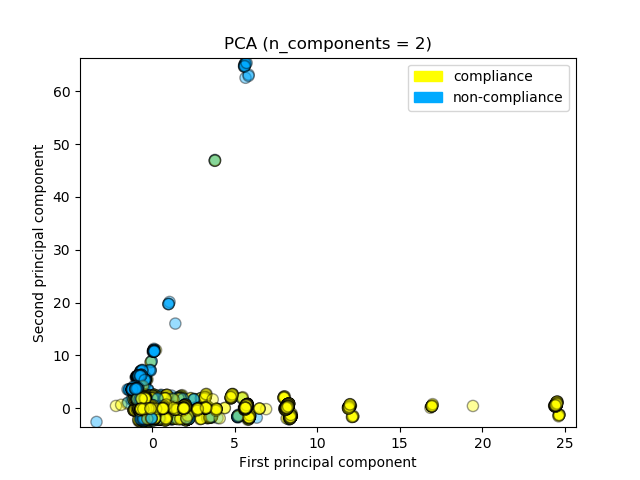

In [86]:
%matplotlib notebook
import seaborn as sn
import matplotlib.pyplot as plt

from adspy_shared_utilities import plot_labelled_scatter
plot_labelled_scatter(X_pca, y_train, ['compliance', 'non-compliance'])

plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('PCA (n_components = 2)');

<IPython.core.display.Javascript object>


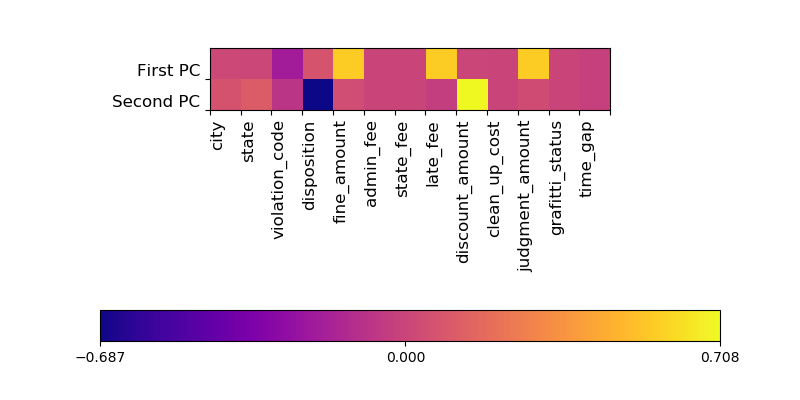

In [87]:
fig = plt.figure(figsize=(8, 4))
plt.imshow(pca.components_, interpolation = 'none', cmap = 'plasma')
feature_names = X_train_converted_na_dropped.columns

plt.gca().set_xticks(np.arange(-.5, len(feature_names)));
plt.gca().set_yticks(np.arange(0.5, 2));
plt.gca().set_xticklabels(feature_names, rotation=90, ha='left', fontsize=12);
plt.gca().set_yticklabels(['First PC', 'Second PC'], va='bottom', fontsize=12);

plt.colorbar(orientation='horizontal', ticks=[pca.components_.min(), 0, 
                                              pca.components_.max()], pad=0.65);

In [88]:
pc1, pc2 = pca.components_
pc1

array([ 0.01960156,  0.01214888, -0.19316241,  0.07173623,  0.56485321,
        0.        ,  0.        ,  0.56370443,  0.00938354,  0.        ,
        0.56535256,  0.        , -0.0218398 ])

In [89]:
print('pc1 least principal conponent: ', feature_names[np.argmin(pc1)])
print('pc1 most principal conponent: ', feature_names[np.argmax(pc1)])
print('')
print('pc2 least principal conponent: ', feature_names[np.argmin(pc2)])
print('pc2 most principal conponent: ', feature_names[np.argmax(pc2)])

pc1 least principal conponent:  violation_code
pc1 most principal conponent:  judgment_amount

pc2 least principal conponent:  disposition
pc2 most principal conponent:  discount_amount
